In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

###  Main Paramters

In [2]:
data_route = './data/'

In [3]:
train_data = pd.read_csv(data_route+'train.csv')
label_data = train_data['Survived']
test_data = pd.read_csv(data_route+'test.csv')

In [4]:
for n, t in enumerate(train_data['Pclass']):
    if t == 'C':
        print(n)

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

#  Data Analysis

Survived : Target Label  


Pclass : 1-upper, 2 - middle, 3 - lower  
SibSp : # of sibiling, spouse  
parch : # of parents / children  
tickek : Ticket Number  
Fare : Ticket fare  
embarked : port of embark - C/Q/S


#####  P Class

각 P Class 마다 survived 값을 평균내서 생존 확률로 계산

In [7]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

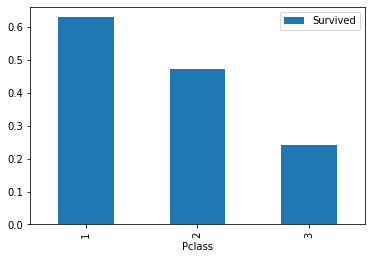

In [8]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

P Class ~ Survived 는 상관관게가 있음

##### SibSp

형제자매 / 배우자 수가 생존률에 영향을 줄지?  
정수값이지만 categorical 은 아님

In [9]:
train_data['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

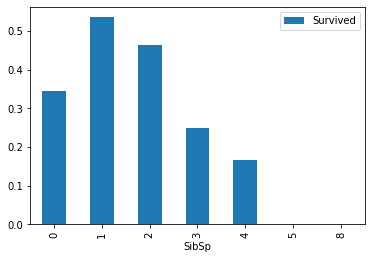

In [10]:
train_data[['SibSp', 'Survived']].groupby(['SibSp'], as_index=True).mean().plot.bar()

#####  parch

In [11]:
train_data['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

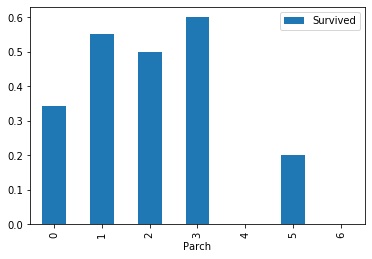

In [12]:
train_data[['Parch', 'Survived']].groupby(['Parch'], as_index=True).mean().plot.bar()

In [13]:
train_data['family'] = train_data['SibSp'] + train_data['Parch']
test_data['family'] = test_data['SibSp'] + test_data['Parch']

train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


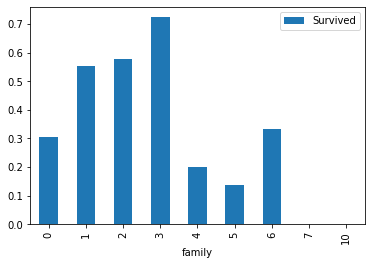

In [14]:
train_data[['family', 'Survived']].groupby(['family'], as_index=True).mean().plot.bar()

가족수가 1~3까지 생존확률 높다  
하나의 feature 로 사용 가능

#####  Ticket

String data 인데, 의미 있을지 잘 모르겠음;  
Ticket Number에 규칙이 있으면 가능할지도  

일단 무시

In [15]:
train_data['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [16]:
# del train_data['Ticket']
# del train_data['SibSp']
# del train_data['Parch']

In [17]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


#####  Fare

In [18]:
train_data['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

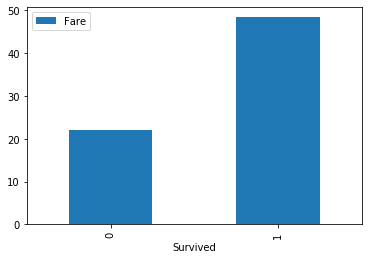

In [19]:
train_data[['Fare', 'Survived']].groupby(['Survived'], as_index=True).mean().plot.bar()

Fare 가 높을수록 Survived 확률이 높음 - 아마 PClass 랑 관계잇을지도

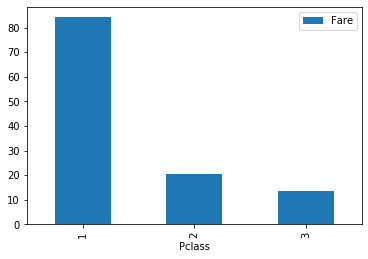

In [20]:
train_data[['Fare', 'Pclass']].groupby(['Pclass'], as_index=True).mean().plot.bar()

가격보다 PClass 가 직관적 - Fare 제거

In [21]:
# del train_data['Fare']
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


#####  성별

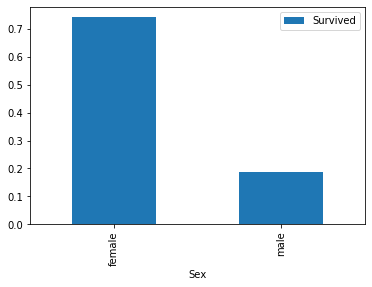

In [22]:
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

Female 확실히 높음

##### Embarked

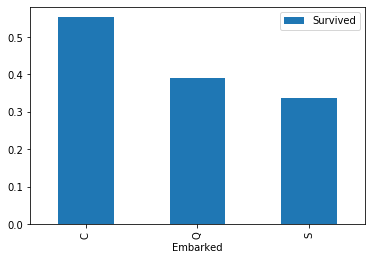

In [23]:
train_data[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().plot.bar()

In [24]:
# del train_data['Cabin']
# del train_data['Name']
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Feature Engineering

###  Fill Na

In [25]:
print(train_data['Pclass'].isnull().values.any())
print(train_data['Sex'].isnull().values.any())
print(train_data['Age'].isnull().values.any())
print(train_data['Embarked'].isnull().values.any())
print(train_data['family'].isnull().values.any())

print(test_data['Pclass'].isnull().values.any())
print(test_data['Sex'].isnull().values.any())
print(test_data['Age'].isnull().values.any())
print(test_data['Embarked'].isnull().values.any())
print(test_data['family'].isnull().values.any())


False
False
True
True
False
False
False
True
False
False


#####  age 에  na 를 채우는 방법

1. 이름 앞 조사로 나이 유추

C:\Users\jhpark\Anaconda3\envs\tensor2.0_env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


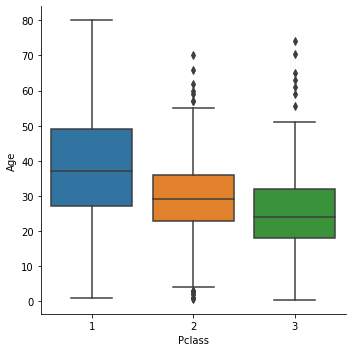

In [26]:
g = sns.factorplot(y="Age",x="Pclass",data=train_data,kind="box")

C:\Users\jhpark\Anaconda3\envs\tensor2.0_env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


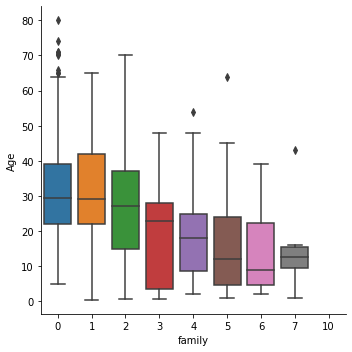

In [27]:
g = sns.factorplot(y="Age",x="family",data=train_data,kind="box")

C:\Users\jhpark\Anaconda3\envs\tensor2.0_env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


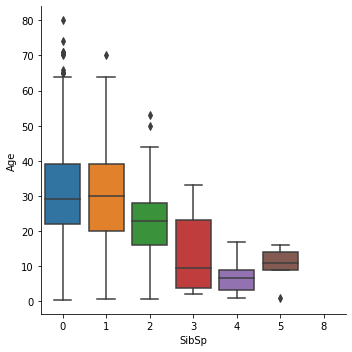

In [28]:
g = sns.factorplot(y="Age",x="SibSp",data=train_data,kind="box")

C:\Users\jhpark\Anaconda3\envs\tensor2.0_env\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


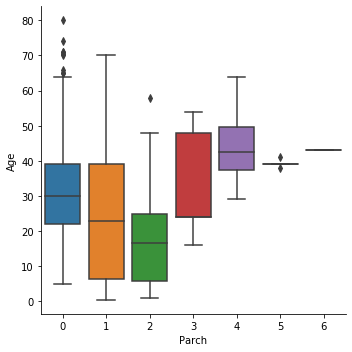

In [29]:
g = sns.factorplot(y="Age",x="Parch",data=train_data,kind="box")

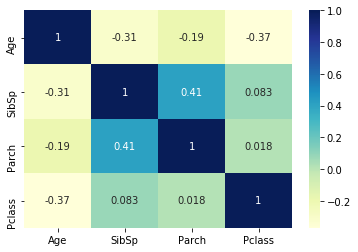

In [30]:
g = sns.heatmap(train_data[["Age","SibSp","Parch","Pclass"]].corr(),cmap="YlGnBu",annot=True)

In [31]:
temp_data = pd.DataFrame(train_data, columns = ['Age', 'Pclass'])
temp_data.describe()

,Age,Pclass
count,714.000000,891.000000
mean,29.699118,2.308642
std,14.526497,0.836071
min,0.420000,1.000000
25%,20.125000,2.000000
50%,28.000000,3.000000
75%,38.000000,3.000000
max,80.000000,3.000000


In [32]:
temp1_data = temp_data.where(temp_data['Pclass'] == 1)
temp1_data.describe()

,Age,Pclass
count,186.000000,216.0
mean,38.233441,1.0
std,14.802856,0.0
min,0.920000,1.0
25%,27.000000,1.0
50%,37.000000,1.0
75%,49.000000,1.0
max,80.000000,1.0


In [33]:
temp2_data = temp_data.where(temp_data['Pclass'] == 2)
temp2_data.describe()

,Age,Pclass
count,173.000000,184.0
mean,29.877630,2.0
std,14.001077,0.0
min,0.670000,2.0
25%,23.000000,2.0
50%,29.000000,2.0
75%,36.000000,2.0
max,70.000000,2.0


In [34]:
temp3_data = temp_data.where(temp_data['Pclass'] == 3)
temp3_data.describe()

,Age,Pclass
count,355.000000,491.0
mean,25.140620,3.0
std,12.495398,0.0
min,0.420000,3.0
25%,18.000000,3.0
50%,24.000000,3.0
75%,32.000000,3.0
max,74.000000,3.0


In [35]:
train_data.loc[(train_data.Age.isnull())&(train_data.Pclass==1),'Age'] = 38
train_data.loc[(train_data.Age.isnull())&(train_data.Pclass==2),'Age'] = 30
train_data.loc[(train_data.Age.isnull())&(train_data.Pclass==3),'Age'] = 25

test_data.loc[(test_data.Age.isnull())&(test_data.Pclass==1),'Age'] = 38
test_data.loc[(test_data.Age.isnull())&(test_data.Pclass==2),'Age'] = 30
test_data.loc[(test_data.Age.isnull())&(test_data.Pclass==3),'Age'] = 25

In [36]:
train_data['Age'].isnull().any()
test_data['Age'].isnull().any()

False

In [37]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,family
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.265062,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,13.212184,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


#####  Embarked Fill na - 2개뿐

In [38]:
for n, t in enumerate(train_data['Pclass']):
    if t == 'C':
        print(n)
        
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,family
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,29.527512,0.447368,0.392344,35.627188,0.839713
std,120.810458,0.841838,12.851641,0.896760,0.981429,55.907576,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,25.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,36.375000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000


In [39]:
train_data['Embarked'].loc[(train_data['Embarked'].isnull())] = 'C'
test_data['Embarked'].loc[(test_data['Embarked'].isnull())] = 'C'
test_data['Fare'].loc[(test_data['Fare'].isnull())] = 35

C:\Users\jhpark\Anaconda3\envs\tensor2.0_env\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
for n, t in enumerate(train_data['Pclass']):
    if t == 'C':
        print(n)

In [41]:
print(train_data['Age'].isnull().values.any())
print(test_data['Embarked'].isnull().values.any())

False
False


#  Setup Train / Val Data

In [42]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [43]:
for n, t in enumerate(train_data['Pclass']):
    if t == 'C':
        print(n)

In [44]:
features = ['Pclass', 'cat_Sex', 'Age','family', 'Fare', 'cat_Emb']

train_data['cat_Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['cat_Emb'] = train_data['Embarked'].map({'C': 0, 'S': 1, 'Q':2})

test_data['cat_Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['cat_Emb'] = test_data['Embarked'].map({'C': 0, 'S': 1, 'Q':2})

feature_data = train_data[features]
label = train_data['Survived']

print(test_data['Pclass'].isnull().values.any())
print(test_data['Sex'].isnull().values.any())
print(test_data['Age'].isnull().values.any())
print(test_data['Embarked'].isnull().values.any())
print(test_data['family'].isnull().values.any())
print(test_data['cat_Sex'].isnull().values.any())
print(test_data['Fare'].isnull().values.any())

False
False
False
False
False
False
False


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

tf.version.VERSION

'2.0.0'

In [46]:
X_tr, X_vld, y_tr, y_vld = train_test_split(feature_data, label, test_size=0.3, random_state=18)

In [47]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
# model.fit(feature_data, label)
prediction = model.predict(X_vld)
result = model.predict(test_data[features])
# print(result)

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Activation, BatchNormalization

model = Sequential()
model.add(Input(len(feature_data.columns)))

model.add(Dense(32))
model.add(Activation('elu'))

model.add(Dense(64))
model.add(Activation('elu'))

model.add(Dense(128))
model.add(Activation('elu'))

model.add(Dense(256))
model.add(Activation('elu'))

model.add(Dense(512))
model.add(Activation('elu'))

model.add(Dense(1024))
model.add(Activation('elu'))


model.add(Dense(512))
model.add(Activation('elu'))


model.add(Dense(256))
model.add(Activation('elu'))


model.add(Dense(128))
model.add(Activation('elu'))

model.add(Dense(64))
model.add(Activation('elu'))

model.add(Dense(32))
model.add(Activation('elu'))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             loss = tf.keras.losses.binary_crossentropy,
             metrics=['acc'])

model.fit(feature_data, label_data, epochs = 100, batch_size=64, shuffle=True, validation_split=0.3)

t_result = model.predict(test_data[features])

result = []
for temp in t_result:
    if temp[0] >= 0.5:
        result.append(1)
    else:
        result.append(0)
    

Train on 623 samples, validate on 268 samples
Epoch 1/100
623/623 [==============================] - 0s 497us/sample - loss: 0.6558 - acc: 0.6196 - val_loss: 0.5951 - val_acc: 0.6791
Epoch 2/100
623/623 [==============================] - 0s 90us/sample - loss: 0.6338 - acc: 0.6677 - val_loss: 0.5451 - val_acc: 0.7276
Epoch 3/100
623/623 [==============================] - 0s 87us/sample - loss: 0.6180 - acc: 0.6629 - val_loss: 0.5705 - val_acc: 0.7090
Epoch 4/100
623/623 [==============================] - 0s 88us/sample - loss: 0.6116 - acc: 0.6774 - val_loss: 0.5432 - val_acc: 0.7239
Epoch 5/100
623/623 [==============================] - 0s 88us/sample - loss: 0.6062 - acc: 0.6822 - val_loss: 0.5514 - val_acc: 0.7276
Epoch 6/100
623/623 [==============================] - 0s 88us/sample - loss: 0.6005 - acc: 0.6998 - val_loss: 0.5322 - val_acc: 0.7537
Epoch 7/100
623/623 [==============================] - 0s 85us/sample - loss: 0.6001 - acc: 0.6918 - val_loss: 0.5490 - val_acc: 0.7201
E

623/623 [==============================] - 0s 83us/sample - loss: 0.4315 - acc: 0.8138 - val_loss: 0.4971 - val_acc: 0.7687
Epoch 60/100
623/623 [==============================] - 0s 85us/sample - loss: 0.4823 - acc: 0.7769 - val_loss: 0.4314 - val_acc: 0.7910
Epoch 61/100
623/623 [==============================] - 0s 85us/sample - loss: 0.4579 - acc: 0.7929 - val_loss: 0.4221 - val_acc: 0.7948
Epoch 62/100
623/623 [==============================] - 0s 85us/sample - loss: 0.4408 - acc: 0.7978 - val_loss: 0.4191 - val_acc: 0.8022
Epoch 63/100
623/623 [==============================] - 0s 90us/sample - loss: 0.4332 - acc: 0.8026 - val_loss: 0.4328 - val_acc: 0.8022
Epoch 64/100
623/623 [==============================] - 0s 89us/sample - loss: 0.4411 - acc: 0.8074 - val_loss: 0.4402 - val_acc: 0.7910
Epoch 65/100
623/623 [==============================] - 0s 92us/sample - loss: 0.4338 - acc: 0.8074 - val_loss: 0.4223 - val_acc: 0.7948
Epoch 66/100
623/623 [==============================] 

In [57]:
import sklearn
print('{:.2f}%'.format(100 * sklearn.metrics.accuracy_score(prediction, y_vld)))

82.09%


In [66]:
result

[0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,


{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [50]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=feature_data.columns)

AttributeError: 'Sequential' object has no attribute 'feature_importances_'

In [ ]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [67]:
sample = pd.read_csv(data_route+'gender_submission.csv' )

In [68]:
sample['Survived'] = result

In [69]:
sample

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [70]:
sample.to_csv(data_route+'out.csv', index=False)